In [ ]:
##### Eugenio Perez Molphe Montoya #####
##### 21.10.2024 #####
##### Take the lists of E. coli genomes with iroN, the df with promoters, and the lists with the immunity genes #####
##### and create a df with the promoters and the immunity genes, and a Venn diagram of immunity genes vs argR #####

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from scipy.stats import chi2_contingency

In [2]:
# Files
df = pd.read_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df_with_iroN.csv", sep='\t') # Promoters
df.rename(columns={'Unnamed: 0': 'Genome'}, inplace=True)
df['ArgR'] = ((df['argR'] == 1) | (df['argR2'] == 1)).astype(int)
df = df.drop(['argR', 'argR2'], axis=1)
df['Genome'] = df['Genome'].apply(lambda x: x + '.1' if not x.endswith('.1') else x)

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Escherichia_w_iroN.txt") as f:
    iroN = f.readlines() # iroN

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/mchB_list.txt") as f:
    mchB = f.readlines() # Immunity genes: mchB

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/mchI_list.txt") as f:
    mchI = f.readlines() # Immunity genes: mchI

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/microcin_list.txt") as f:
    microcin = f.readlines() # Immunity genes: microcin

In [4]:
# Check number of genomes with mchB, mchI, and microcin
print(len(mchB), len(mchI), len(microcin))

# Number of genomes with mchB and mchI
print(len(set(mchB) & set(mchI)))

46 532 697
46


In [3]:
### Functions :D
def get_promoters(df, genomesList, geneName):
    '''Get the promoters of the genomes in the list and append them the df as a new column'''
    # Strip any whitespace from the genomes list
    genomesList = [genome.strip() for genome in genomesList]
    # Add a new presence/absence column to the df
    df[geneName] = df['Genome'].apply(lambda x: 1 if x in genomesList else 0)

    return df

def chi_test(promoter, df, out):
    ''' Perform a chi-squared test of independence between the presence of the immunity genes and the presence of a promoter'''
    # Create a contingency table
    obs = pd.crosstab(df[promoter], [df['mchB'], df['mchI']])

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(obs)
    print(f"{promoter}: {chi2}, p-value: {p}, dof: {dof}")

    # Write the results to a file
    with open(out, 'a') as f:
        f.write(f"{promoter}: {chi2}, p-value: {p}, dof: {dof}\n")


In [4]:
# So names in the DF are not the accession numbers, so I'll change that

# Read the two columns CSV file with the accesion codes for the contig names as a dictionary
accession_dict = pd.read_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Escherichia_contig-NCBI_codes.csv", header=None, index_col=0).to_dict()

# Replace the names in the dataframe with the accession numbers
df['Genome'] = df['Genome'].apply(lambda x: accession_dict[1][x] if x in accession_dict[1] else x)

print(df)

               Genome  ada  araC  arcA  cpxR  crp  farR  fis  fnr  fur  ...  \
0     GCA_012832335.1    0     0     0     0    0     0    0    0    0  ...   
1     GCA_017580805.1    0     0     0     0    0     0    0    0    0  ...   
2     GCA_014271505.1    0     0     0     0    0     0    0    0    0  ...   
3     GCA_001463455.1    0     0     0     0    0     0    0    0    0  ...   
4     GCA_003903315.1    0     0     0     0    0     0    0    0    0  ...   
...               ...  ...   ...   ...   ...  ...   ...  ...  ...  ...  ...   
1797  GCA_016946115.1    0     0     0     0    0     0    0    0    0  ...   
1798  GCA_007844635.1    0     0     0     0    0     0    0    0    0  ...   
1799  GCA_003779805.1    0     0     0     0    0     0    0    0    0  ...   
1800  GCA_902828165.1    0     0     0     0    0     0    0    0    0  ...   
1801  GCA_019577055.1    0     0     0     0    0     0    0    0    0  ...   

      rpoD15  rpoD16  rpoD17  rpoD18  rpoD19  rpoH2

In [5]:
# Add a column for each immunity gene
df = get_promoters(df, mchB, 'mchB')
df = get_promoters(df, mchI, 'mchI')
df = get_promoters(df, microcin, 'microcin')

# Save the df
df.to_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df_with_immunity_genes.csv", sep='\t', index=False)

print(df)

               Genome  ada  araC  arcA  cpxR  crp  farR  fis  fnr  fur  ...  \
0     GCA_012832335.1    0     0     0     0    0     0    0    0    0  ...   
1     GCA_017580805.1    0     0     0     0    0     0    0    0    0  ...   
2     GCA_014271505.1    0     0     0     0    0     0    0    0    0  ...   
3     GCA_001463455.1    0     0     0     0    0     0    0    0    0  ...   
4     GCA_003903315.1    0     0     0     0    0     0    0    0    0  ...   
...               ...  ...   ...   ...   ...  ...   ...  ...  ...  ...  ...   
1797  GCA_016946115.1    0     0     0     0    0     0    0    0    0  ...   
1798  GCA_007844635.1    0     0     0     0    0     0    0    0    0  ...   
1799  GCA_003779805.1    0     0     0     0    0     0    0    0    0  ...   
1800  GCA_902828165.1    0     0     0     0    0     0    0    0    0  ...   
1801  GCA_019577055.1    0     0     0     0    0     0    0    0    0  ...   

      rpoD18  rpoD19  rpoH2  rpoH3  soxS  tyrR  Arg

In [ ]:
### So I used the df created up until now to filter it, removing the genomes that I'm not sure if they even have iroN
### This line is to read the filtered df and continue with the analysis

# Filtered df
path = "/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df_with_iroN.csv"
df = pd.read_csv(path, sep='\t')

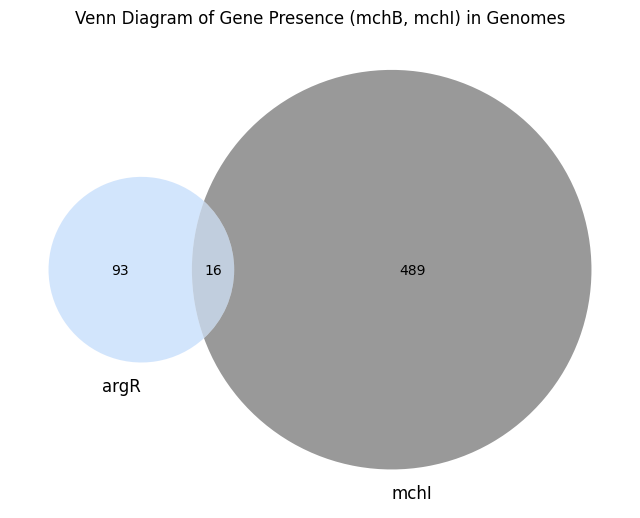

In [8]:
# Time to do the Venn diagram

# Select the genes that I want to see the Venn diagram of
geneA = 'ArgR'
geneB = 'mchB'
geneC = 'mchI'

# Convert columns to sets (index of genomes that have the gene)
setA = set(df[df[geneA] >= 1].index)
setB = set(df[df[geneB] >= 1].index)
setC = set(df[df[geneC] >= 1].index)

# Plot a Venn diagram
plt.figure(figsize=(8, 8))

# For three genes:
# venn3([setA, setB, setC], set_labels=('ArgR', 'mchB', 'mchI'), set_colors=('#90bFF9', 'grey', 'black'))

# To get who has mchI and mchB or both
venn2([setA, setC], set_labels=('argR', 'mchI'), set_colors=('#90bFF9', 'black'))

plt.title("Venn Diagram of Gene Presence (mchB, mchI) in Genomes")
plt.show()

In [9]:
print(df['mchB'].sum())

39


In [6]:
# Chi-squared test for microcin
# The path of the output file
out = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Chit_sqr.txt'

# Chi-squared test for ArgR
obs = pd.crosstab(df['microcin'], df['ArgR'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"microcin vs ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"microcin vs ArgR: {chi2}, p-value: {p}, dof: {dof}\n")

# Chi-squared test for mchI
obs = pd.crosstab(df['microcin'], df['mchB'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"microcin vs mchB: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"microcin vs mchB: {chi2}, p-value: {p}, dof: {dof}\n")

microcin vs ArgR: 1.6417107149495687, p-value: 0.200090912751756, dof: 1
microcin vs mchB: 66.6964219479234, p-value: 3.1670943451694884e-16, dof: 1


In [7]:
obs = pd.crosstab(df['mchB'], df['ArgR'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"mchB vs ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"mchB vs ArgR: {chi2}, p-value: {p}, dof: {dof}\n")

mchB vs ArgR: 67.97819789923851, p-value: 1.6531333062260296e-16, dof: 1


In [8]:
obs = pd.crosstab(df['mchI'], df['ArgR'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"mchI vs ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"mchI vs ArgR: {chi2}, p-value: {p}, dof: {dof}\n")

mchI vs ArgR: 9.551968905412739, p-value: 0.001997350588091667, dof: 1


In [9]:
# Chi-squared test

# The path of the output file
out = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Chit_sqr.txt'



### mchB vs mchI
# Create a contingency table
obs = pd.crosstab(df['mchB'], df['mchI'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"mchB vs mchI: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"mchB vs mchI: {chi2}, p-value: {p}, dof: {dof}\n")

with open(out, 'a') as f:
    f.write("The following ones are vs mchB & mchI\n")
print("The following ones are vs mchB & mchI")

### Time to do the chi-squared test for the immunity genes vs promoters
# ArgR
chi_test('ArgR', df, out)
# ada
chi_test('ada', df, out)
# araC
chi_test('araC', df, out)
# arcA
chi_test('arcA', df, out)
# cpxR
chi_test('cpxR', df, out)
# crp
chi_test('crp', df, out)
# farR
chi_test('farR', df, out)
# fis
chi_test('fis', df, out)
# fnr
chi_test('fnr', df, out)
# fur
chi_test('fur', df, out)
# ihf
chi_test('ihf', df, out)
# ilvY
chi_test('ilvY', df, out)
# lexA
chi_test('lexA', df, out)
# lrp
chi_test('lrp', df, out)
# ompR
chi_test('ompR', df, out)
# phoB
chi_test('phoB', df, out)
# puR
chi_test('purR', df, out)
# rpoD15
chi_test('rpoD15', df, out)
# rpod16
chi_test('rpoD16', df, out)
# rpoD17
chi_test('rpoD17', df, out)
# rpoD18
chi_test('rpoD18', df, out)
# rpoD19
chi_test('rpoD19', df, out)
# rpoH2
chi_test('rpoH2', df, out)
# rpoH3
chi_test('rpoH3', df, out)
# soxS
chi_test('soxS', df, out)
# tyrR
chi_test('tyrR', df, out)

mchB vs mchI: 98.76536068658592, p-value: 2.8426346087127855e-23, dof: 1
The following ones are vs mchB & mchI
ArgR: 102.87987743543181, p-value: 4.570023838283679e-23, dof: 2
ada: 0.0, p-value: 1.0, dof: 0
araC: 1.9522171150495409, p-value: 0.3767744458215117, dof: 2
arcA: 55.45792916864805, p-value: 2.604855677144991e-11, dof: 4
cpxR: 2.868544656878749, p-value: 0.23828869685026755, dof: 2
crp: 42.07431414470126, p-value: 1.6100313616764856e-08, dof: 4
farR: 0.7795853679431166, p-value: 0.6771972537913507, dof: 2
fis: 11.878558089426718, p-value: 0.0026339279109027203, dof: 2
fnr: 54.6678192775356, p-value: 3.8136460192381804e-11, dof: 4
fur: 0.0, p-value: 1.0, dof: 0
ihf: 13.972851011072393, p-value: 0.007382210076211976, dof: 4
ilvY: 24.558080211504375, p-value: 6.172304194266956e-05, dof: 4
lexA: 68.69491011728054, p-value: 4.280041219809351e-14, dof: 4
lrp: 431.4769642512046, p-value: 4.3843347551634986e-92, dof: 4
ompR: 2.3439649147510186, p-value: 0.30975226152316804, dof: 2
ph